In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
warnings.filterwarnings('ignore')

alpha = []
v = []
sigma = []
x0 = []

In [2]:
def BrownianMotion(num_steps=500, scale=1):
    walk = np.zeros(num_steps)
    steps = np.random.normal(loc=0, scale=scale, size=num_steps)
    walk = np.cumsum(steps)
    return walk

In [28]:
?fig.suptitle

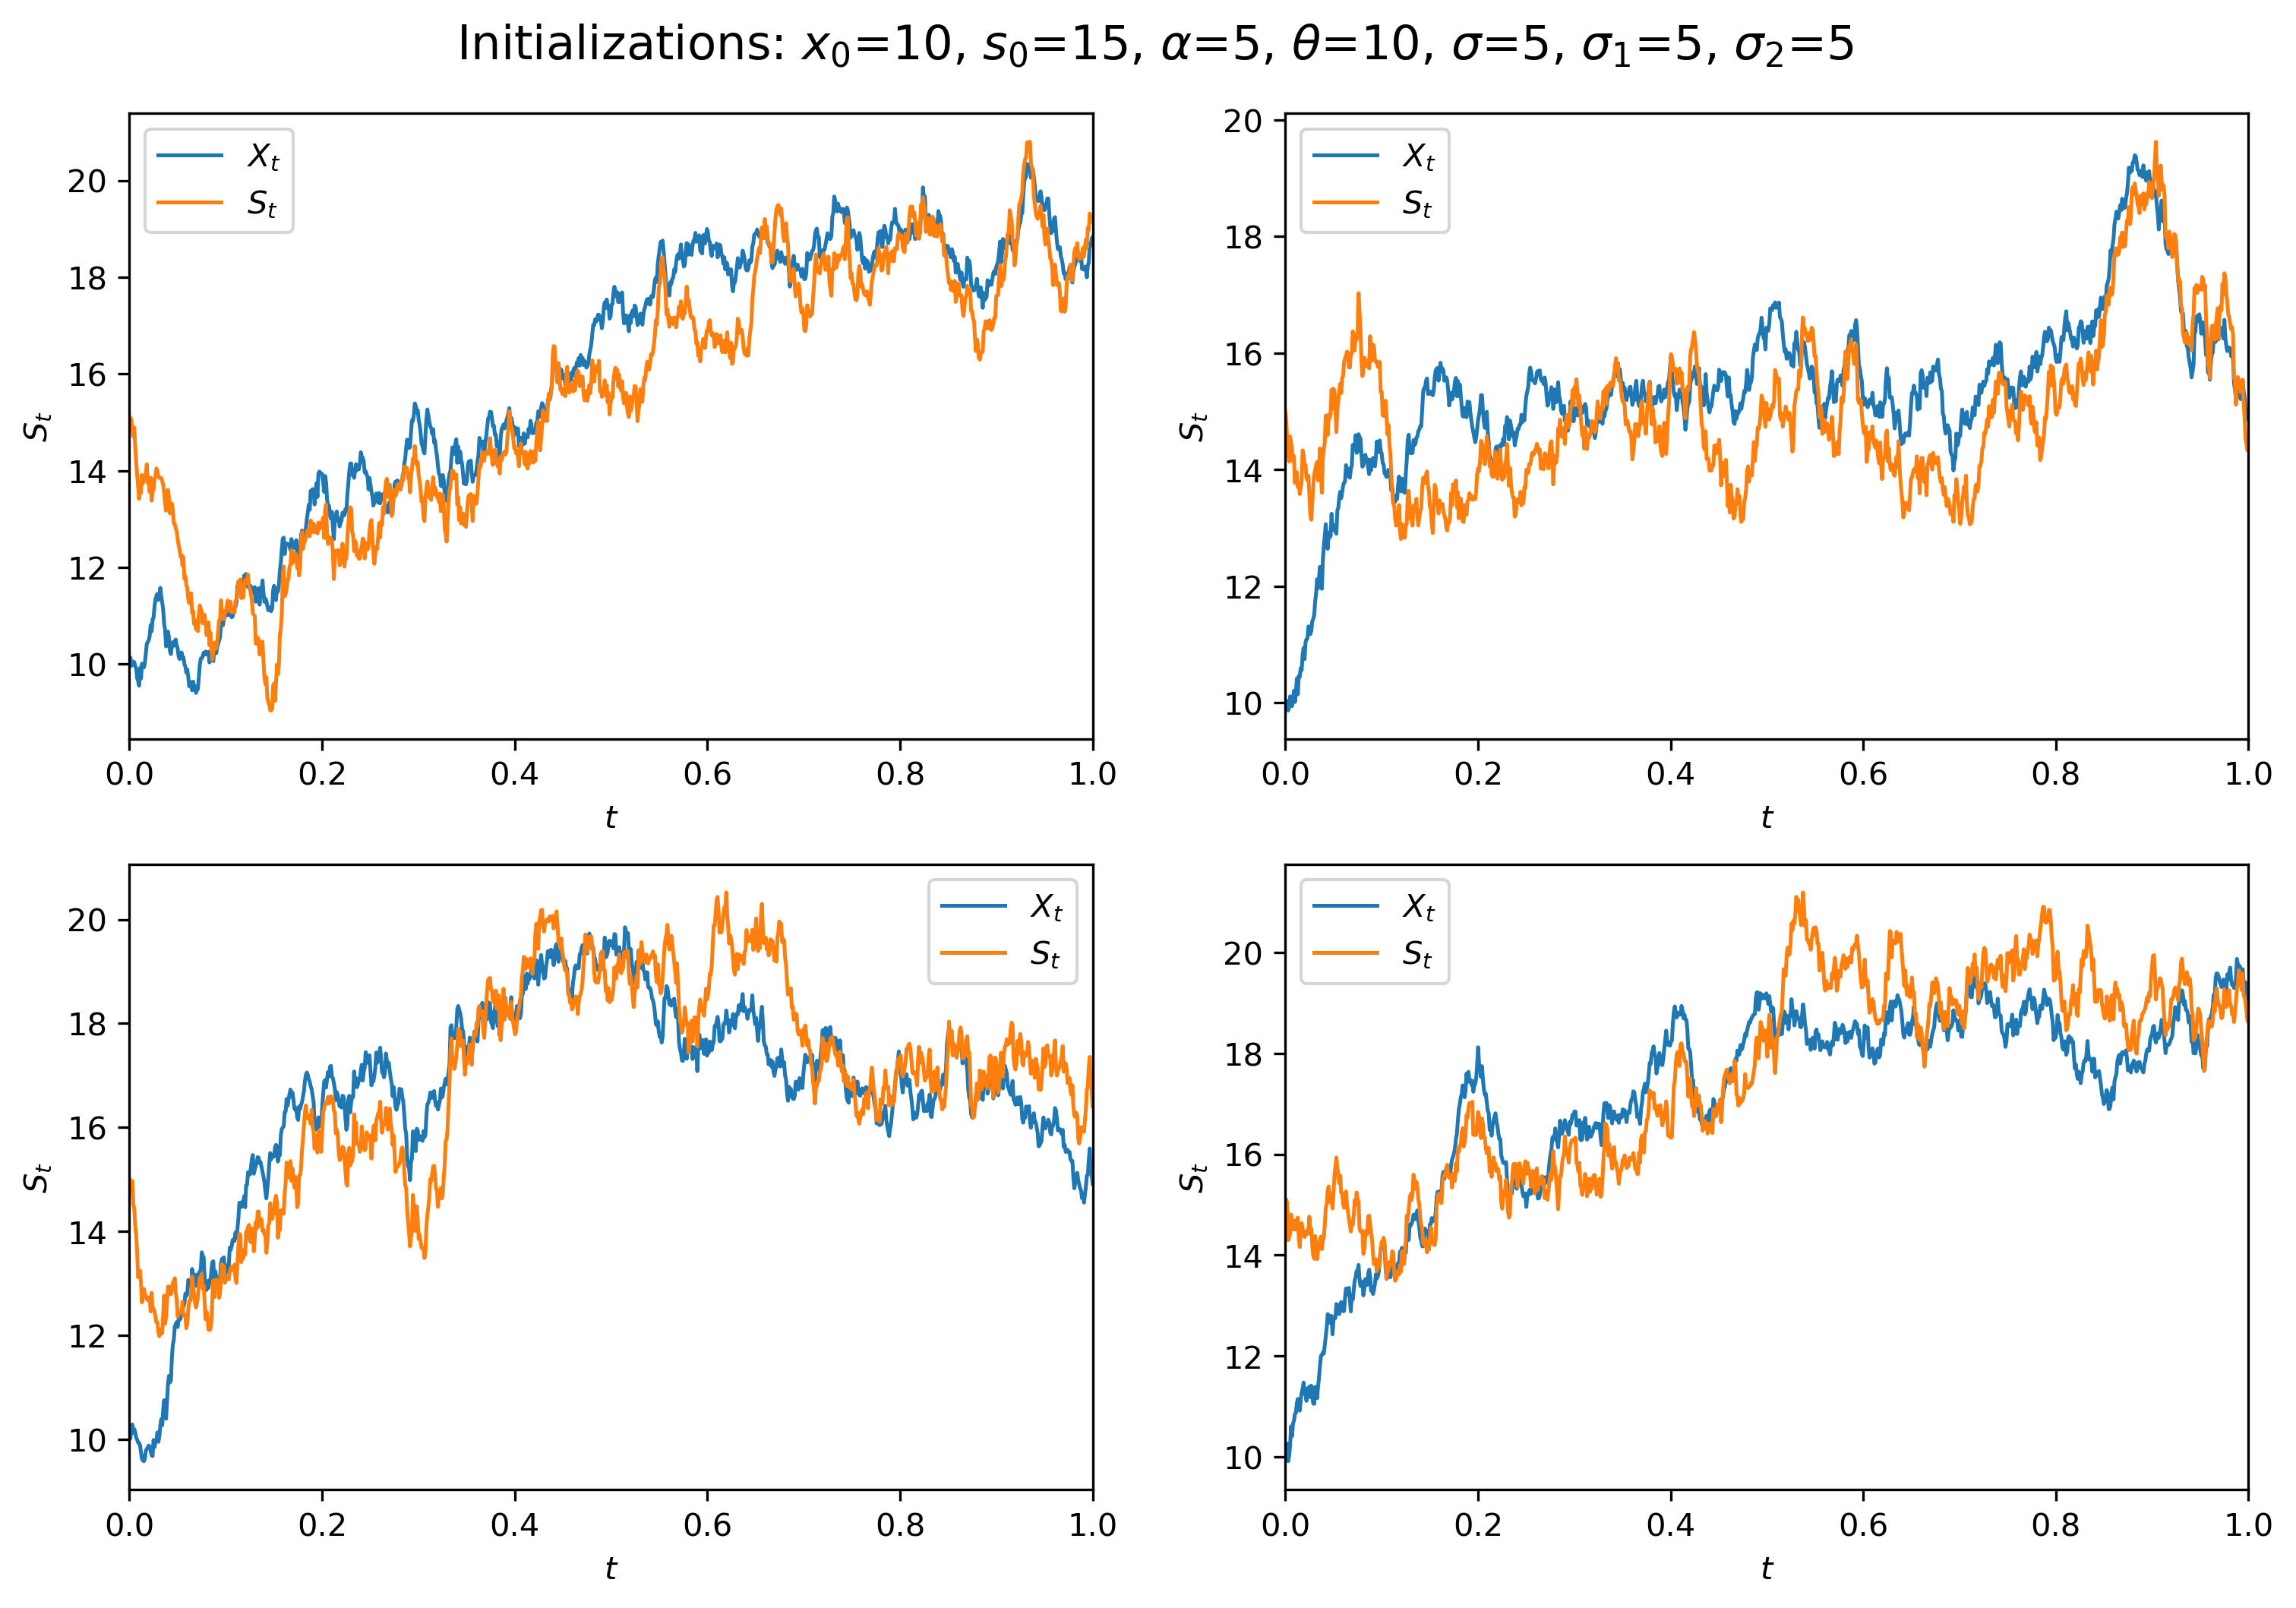

<Figure size 2400x1200 with 0 Axes>

In [42]:
alpha = 5
v=17
sigma= 5
x0=10
theta = 10
sigma1 = 5
sigma2 = 5
s0 = 15
dt = 1/1000
step = 1000
t = dt * step

fig, ax = plt.subplots(ncols=2, nrows=2, dpi=300, figsize=(12,8))
fig.suptitle(f'Initializations: $x_0$={x0}, $s_0$={s0}, $\\alpha$={alpha}, $\\theta$={theta}, $\\sigma$={sigma}, $\\sigma_1$={sigma1}, $\\sigma_2$={sigma2}',
            y=0.93, fontsize=15)
axes=ax.flatten()

def simulate(alpha, v, sigma, x0, dt, theta, sigma1, sigma2, s0, step=500):
    df_sde = pd.DataFrame(np.zeros((step, 8)), columns=['Xt', 'dXt', 'Bt', 'dBt', 'St', 'dSt', 'Wt', 'dWt'])
    df_sde.loc[1:, 'Bt'] = BrownianMotion(num_steps=step-1, scale=np.sqrt(dt))
    df_sde.loc[1:, 'Wt'] = BrownianMotion(num_steps=step-1, scale=np.sqrt(dt))
    df_sde.loc[0, 'Xt'] = x0
    df_sde.loc[0, 'dXt'] = np.nan
    df_sde.loc[0, 'dBt'] = np.nan 
    df_sde.loc[0, 'St'] = s0    
    df_sde.loc[0, 'dSt'] = np.nan   
    df_sde.loc[0, 'dWt'] = np.nan   
    for i in range(1, step):
        df_sde.loc[i, 'dBt'] = df_sde.loc[i, 'Bt'] - df_sde.loc[i-1, 'Bt']
        df_sde.loc[i, 'dWt'] = df_sde.loc[i, 'Wt'] - df_sde.loc[i-1, 'Wt']
        df_sde.loc[i, 'dXt'] = alpha * (v - df_sde.loc[i-1, 'Xt']) * dt + sigma * df_sde.loc[i, 'dBt']
        df_sde.loc[i, 'Xt'] = df_sde.loc[i-1, 'Xt'] + df_sde.loc[i, 'dXt']
        df_sde.loc[i, 'dSt'] = theta * (df_sde.loc[i-1, 'Xt'] - df_sde.loc[i-1, 'St']) * dt + sigma1 * df_sde.loc[i, 'dBt'] + sigma2 * df_sde.loc[i, 'dWt']
        df_sde.loc[i, 'St'] = df_sde.loc[i-1, 'St'] + df_sde.loc[i, 'dSt']
    return df_sde

num_sim = 4
plt.figure(dpi=300, figsize=(8,4))
for i in range(num_sim):
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, theta=theta, dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s0, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.2, label='$X_t$', ax=axes[i])
    sns.lineplot(np.linspace(0, t, step), df['St'], lw=1.2, label='$S_t$', ax=axes[i])
#     sns.lineplot(data=df, x='Xt', y='St')

    axes[i].set_xlabel('$t$')
    axes[i].set_ylabel('$S_t$')
    axes[i].set_xlim(0,1)

plt.tight_layout()

100%|███████████████████████████████████████████| 20/20 [00:07<00:00,  2.51it/s]


Text(0.5, 1.0, 'Effect of $s_0$ ($S_t$)')

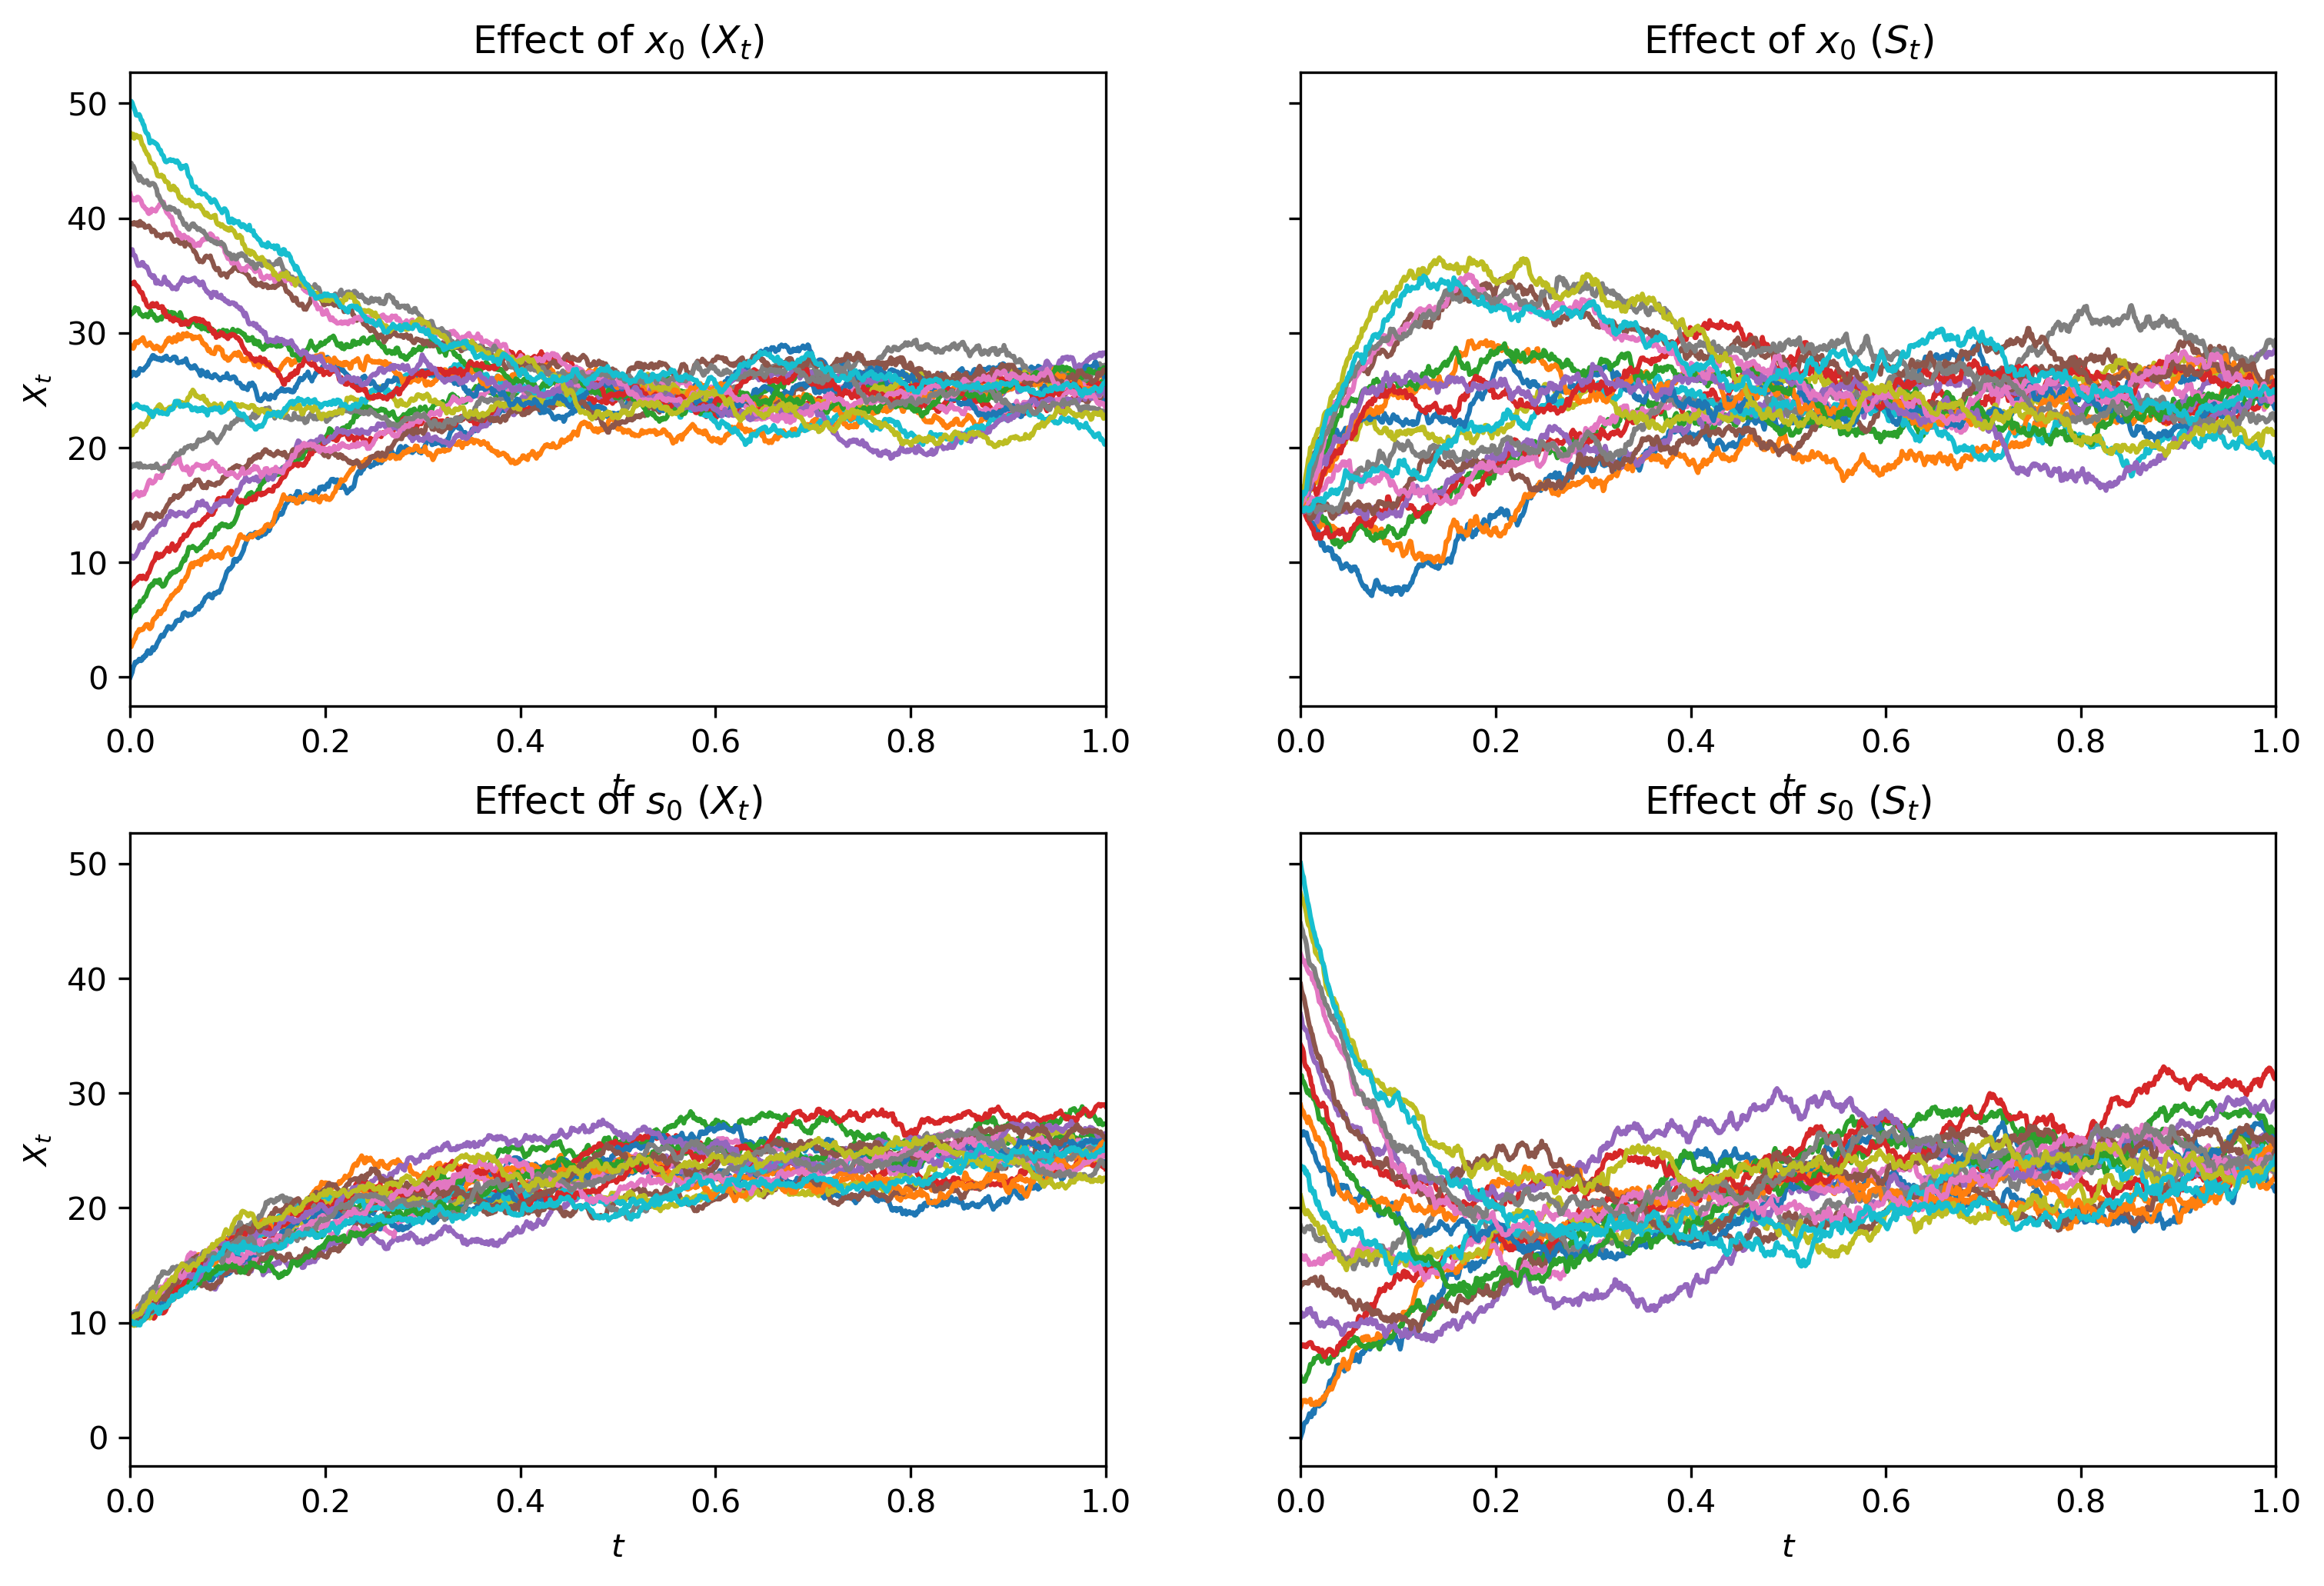

In [49]:
# plt.figure(dpi=300, figsize=(8,4))
from tqdm import tqdm
fig, ax = plt.subplots(nrows=2,ncols=2, dpi=300, figsize=(12,8), sharey=True)
axes = ax.flatten()
x0_list = np.linspace(0,50,20)
s0_list = np.linspace(0,50,20)

for x in tqdm(x0_list):
    df = simulate(alpha=alpha, v=25, sigma=sigma, x0=x, theta=theta, dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s0, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=axes[0])
    sns.lineplot(np.linspace(0, t, step), df['St'], lw=1.5, ax=axes[1])
    axes[0].set_xlabel('$t$')
    axes[0].set_ylabel('$X_t$')
    axes[1].set_xlabel('$t$')
    axes[1].set_ylabel('$S_t$')

for s in tqdm(s0_list):
    df = simulate(alpha=alpha, v=25, sigma=sigma, x0=x0, theta=theta, dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=axes[2])
    sns.lineplot(np.linspace(0, t, step), df['St'], lw=1.5, ax=axes[3])
    axes[2].set_xlabel('$t$')
    axes[2].set_ylabel('$X_t$')
    axes[3].set_xlabel('$t$')
    axes[3].set_ylabel('$S_t$')

for i in range(4):
    axes[i].set_xlim(0,1)

axes[0].set_title(f'Effect of $x_0$ ($X_t$)')
axes[1].set_title(f'Effect of $x_0$ ($S_t$)')
axes[2].set_title(f'Effect of $s_0$ ($X_t$)')
axes[3].set_title(f'Effect of $s_0$ ($S_t$)')
# plt.tight_layout()

In [55]:
theta_list

array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ])

In [57]:
theta

10

In [59]:
s0

15

In [68]:
t = 1

100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  2.53it/s]


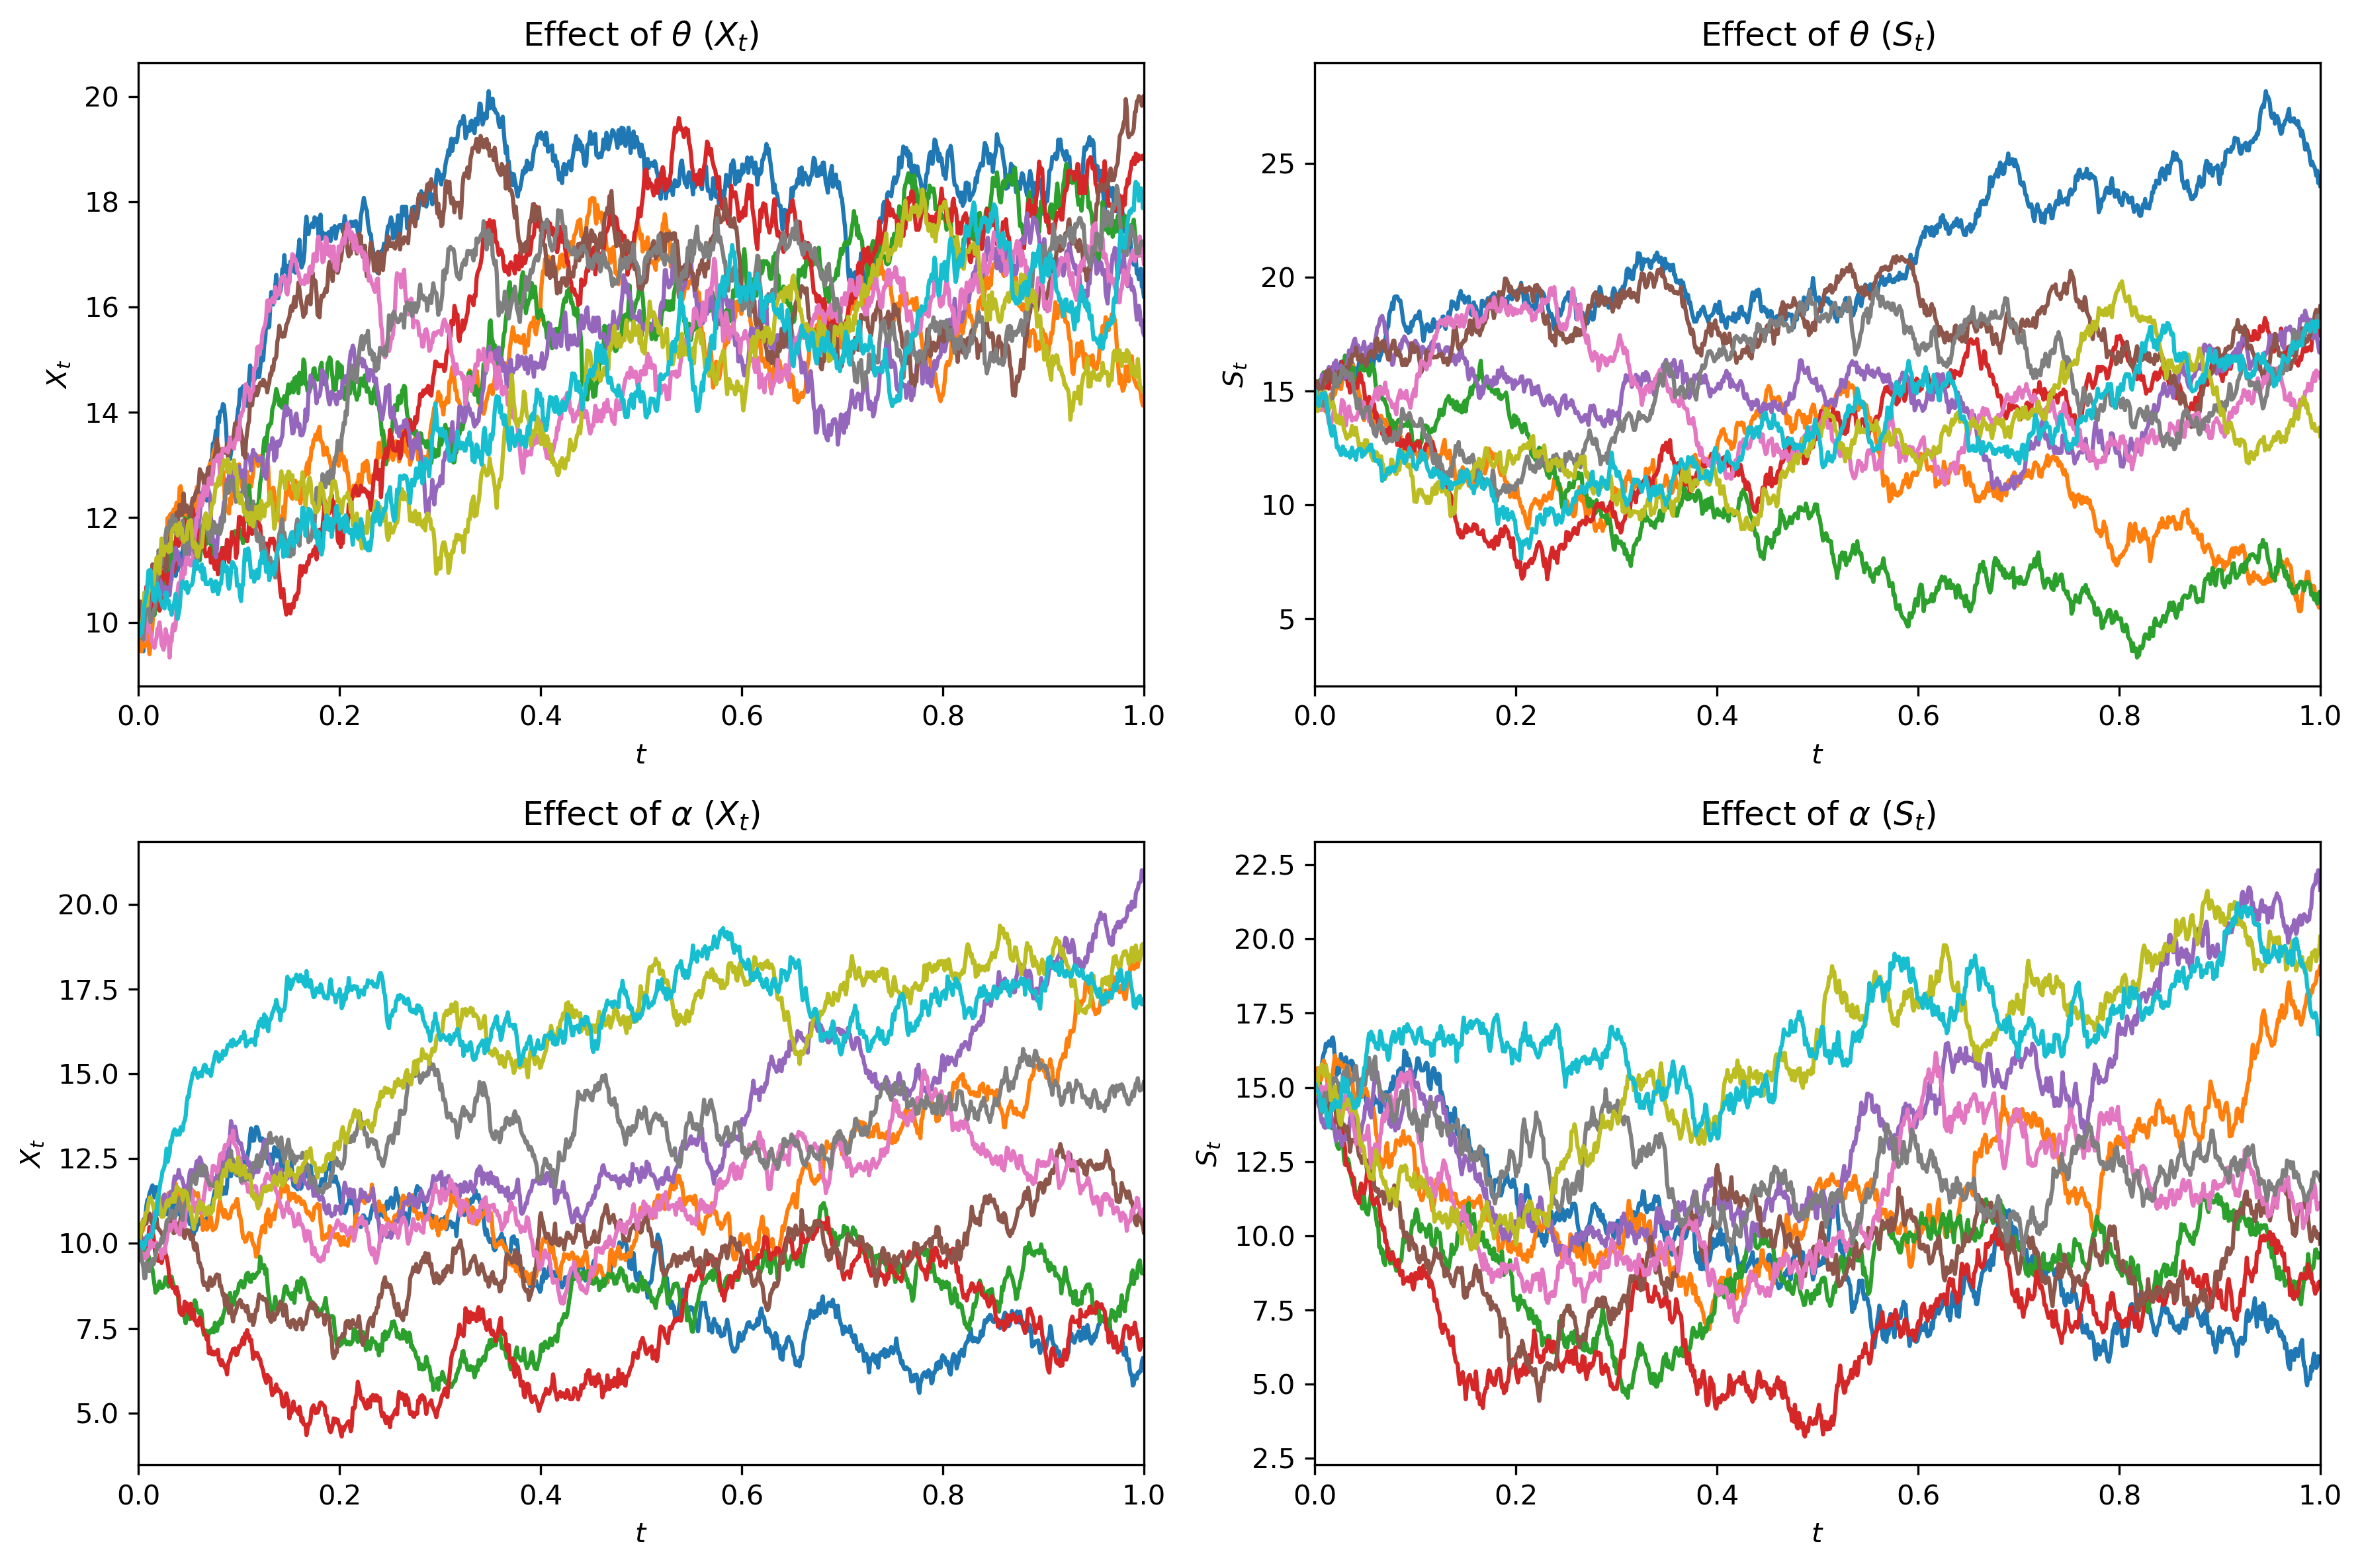

In [71]:
fig, ax = plt.subplots(nrows=2,ncols=2, dpi=300, figsize=(12,8))
axes = ax.flatten()
theta_list = np.logspace(-2, 1, 10)
alpha_list = np.logspace(-2, 1, 10)

for t1 in tqdm(theta_list):
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, theta=t1, dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s0, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=axes[0])
    sns.lineplot(np.linspace(0, t, step), df['St'], lw=1.5, ax=axes[1])
    axes[0].set_xlabel('$t$')
    axes[0].set_ylabel('$X_t$')
    axes[1].set_xlabel('$t$')
    axes[1].set_ylabel('$S_t$')

for a in tqdm(alpha_list):
    df = simulate(alpha=a, v=v, sigma=sigma, x0=x0, theta=theta, dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s0, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=axes[2])
    sns.lineplot(np.linspace(0, t, step), df['St'], lw=1.5, ax=axes[3])
    axes[2].set_xlabel('$t$')
    axes[2].set_ylabel('$X_t$')
    axes[3].set_xlabel('$t$')
    axes[3].set_ylabel('$S_t$')

for i in range(4):
    axes[i].set_xlim(0,1)

axes[0].set_title(f'Effect of $\\theta$ ($X_t$)')
axes[1].set_title(f'Effect of $\\theta$ ($S_t$)')
axes[2].set_title(f'Effect of $\\alpha$ ($X_t$)')
axes[3].set_title(f'Effect of $\\alpha$ ($S_t$)')

plt.tight_layout()

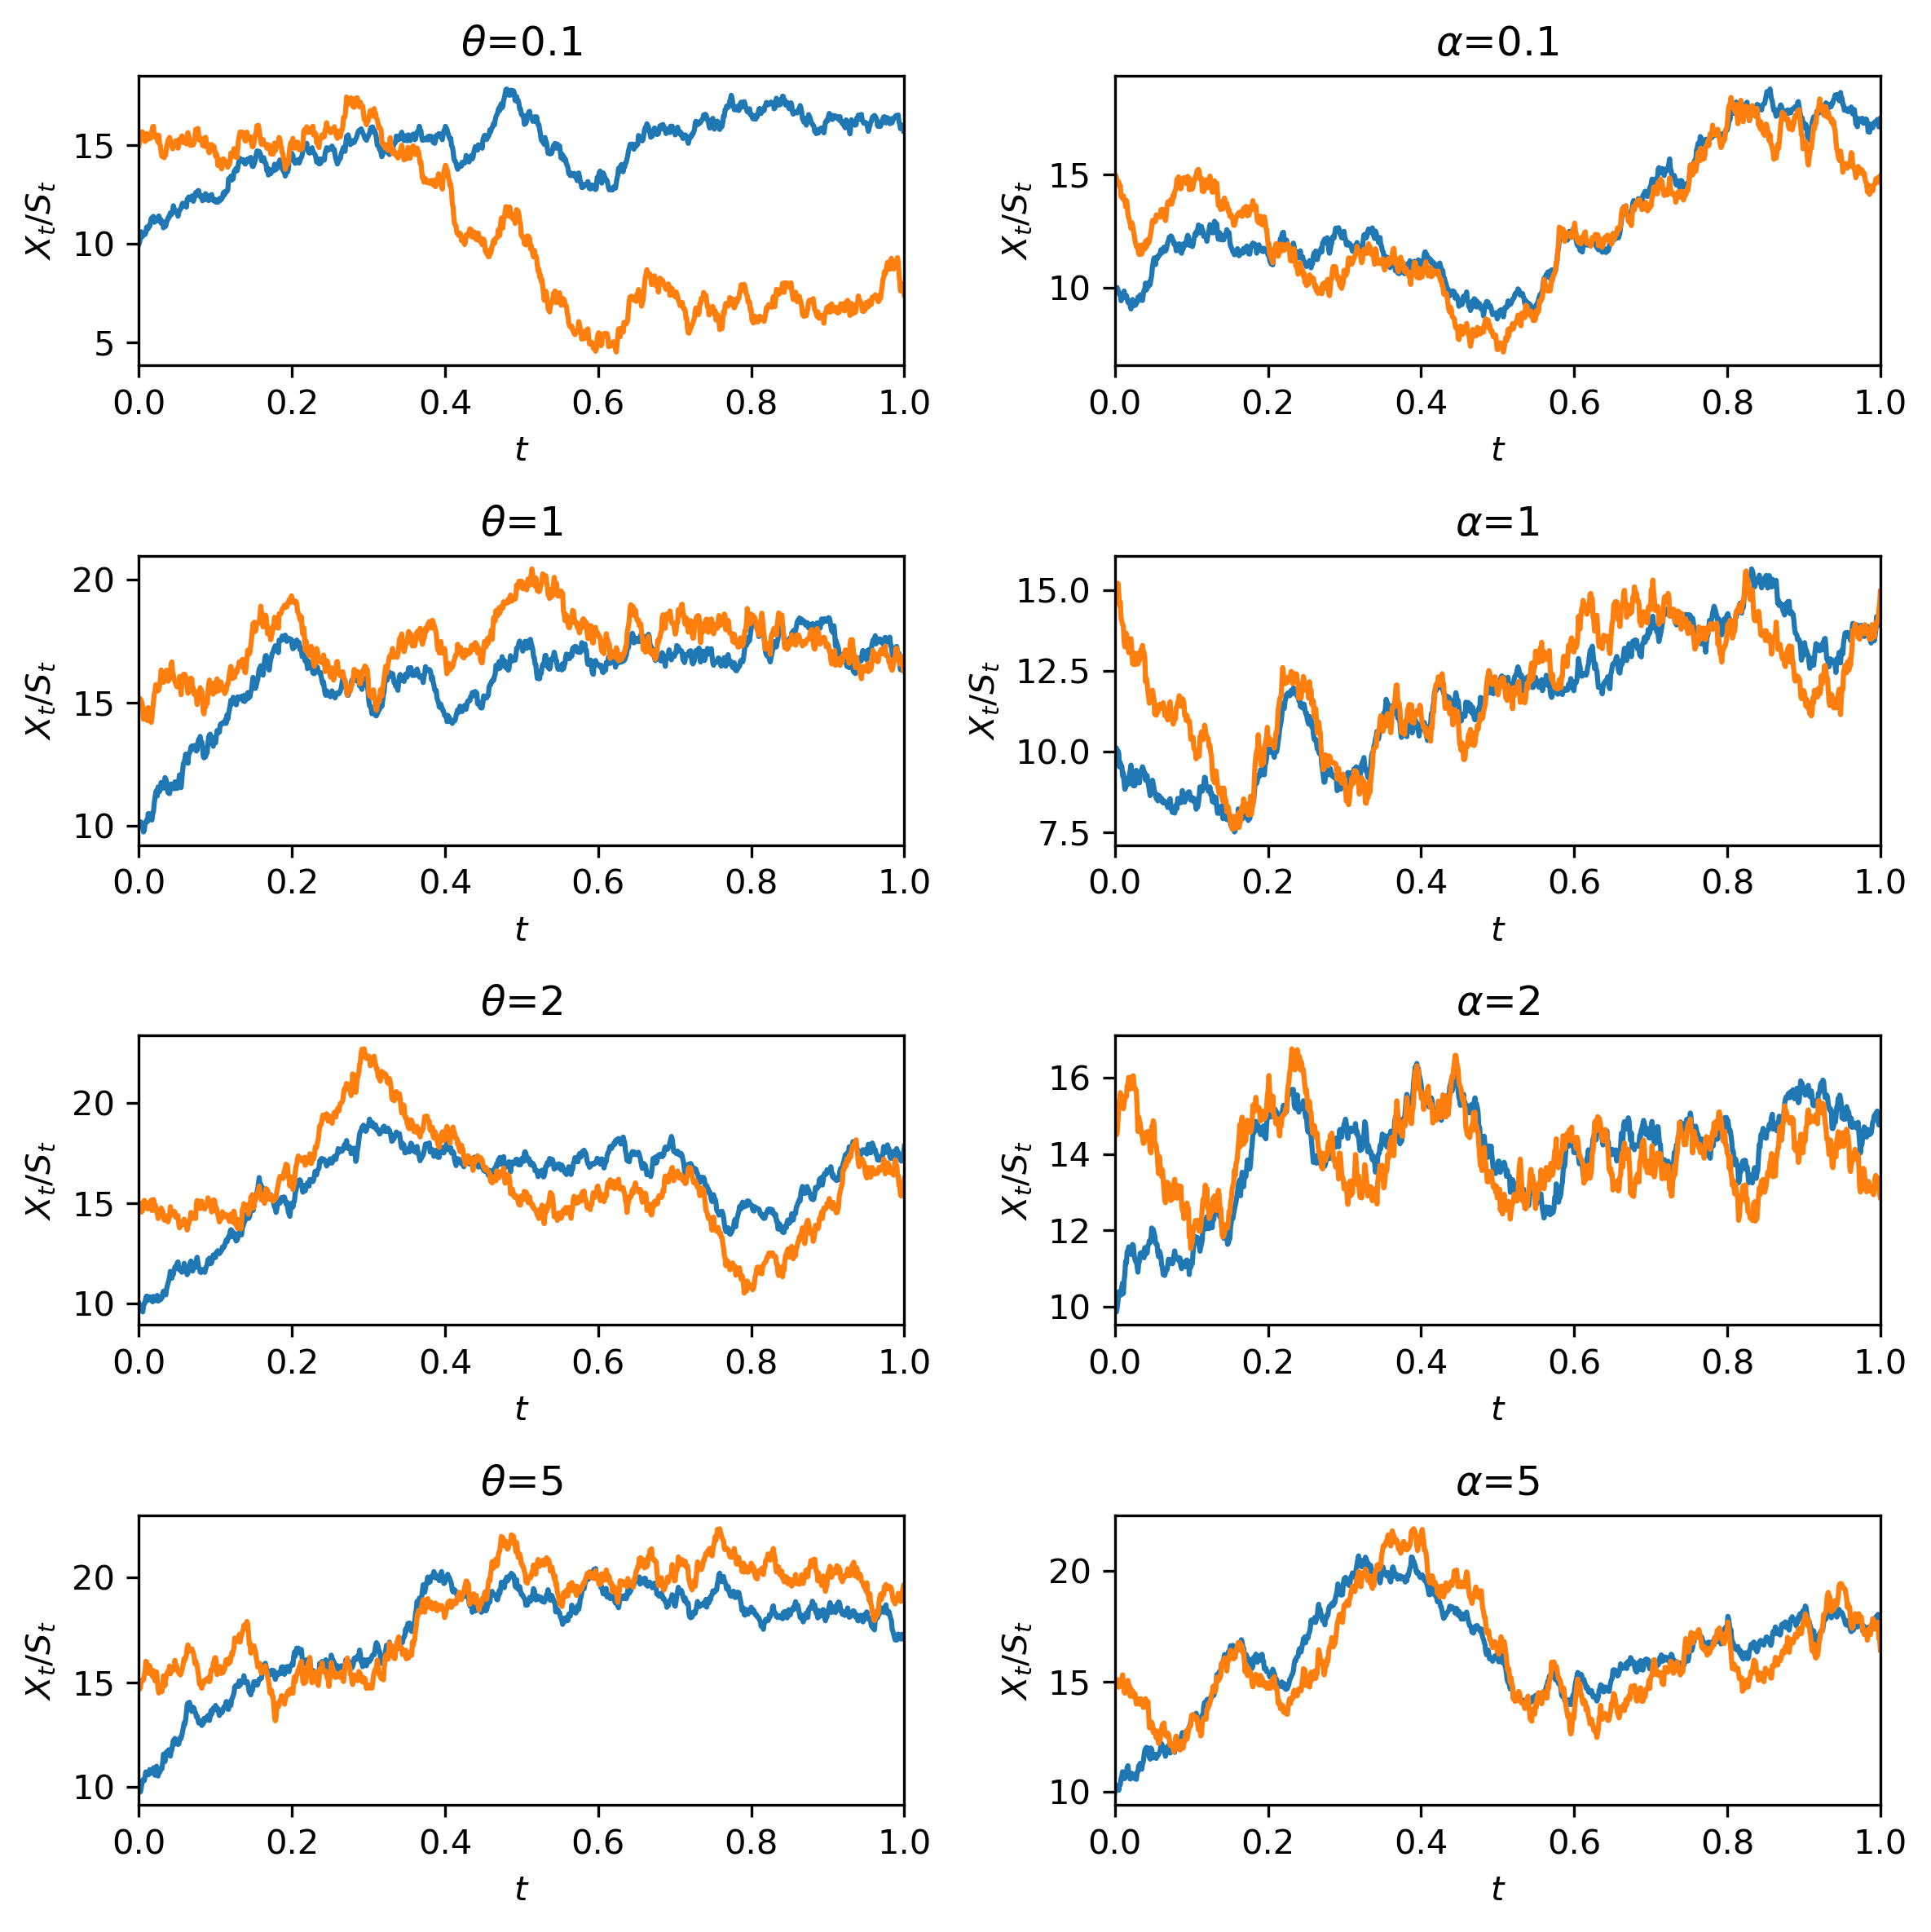

In [132]:
fig, ax = plt.subplots(nrows=4,ncols=2, dpi=300, figsize=(8,8))
theta_list = [0.1, 1,2,5]
alpha_list = [0.1, 1,2,5]

for i in range(4):
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, theta=theta_list[i], dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s0, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=ax[i, 0])
    sns.lineplot(np.linspace(0, t, step), df['St'], lw=1.5, ax=ax[i, 0])
    ax[i,0].set_xlabel('$t$')
    ax[i,0].set_ylabel('$X_t$/$S_t$')
    ax[i,0].set_title(f'$\\theta$={theta_list[i]}')
    ax[i,0].set_xlim(0,1)


for i in range(4):
    df = simulate(alpha=alpha_list[i], v=v, sigma=sigma, x0=x0, theta=theta, dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s0, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=ax[i,1])
    sns.lineplot(np.linspace(0, t, step), df['St'], lw=1.5, ax=ax[i,1])
    ax[i,1].set_xlabel('$t$')
    ax[i,1].set_ylabel('$X_t$/$S_t$')
    ax[i,1].set_title(f'$\\alpha$={alpha_list[i]}')
    ax[i,1].set_xlim(0,1)   

plt.tight_layout()

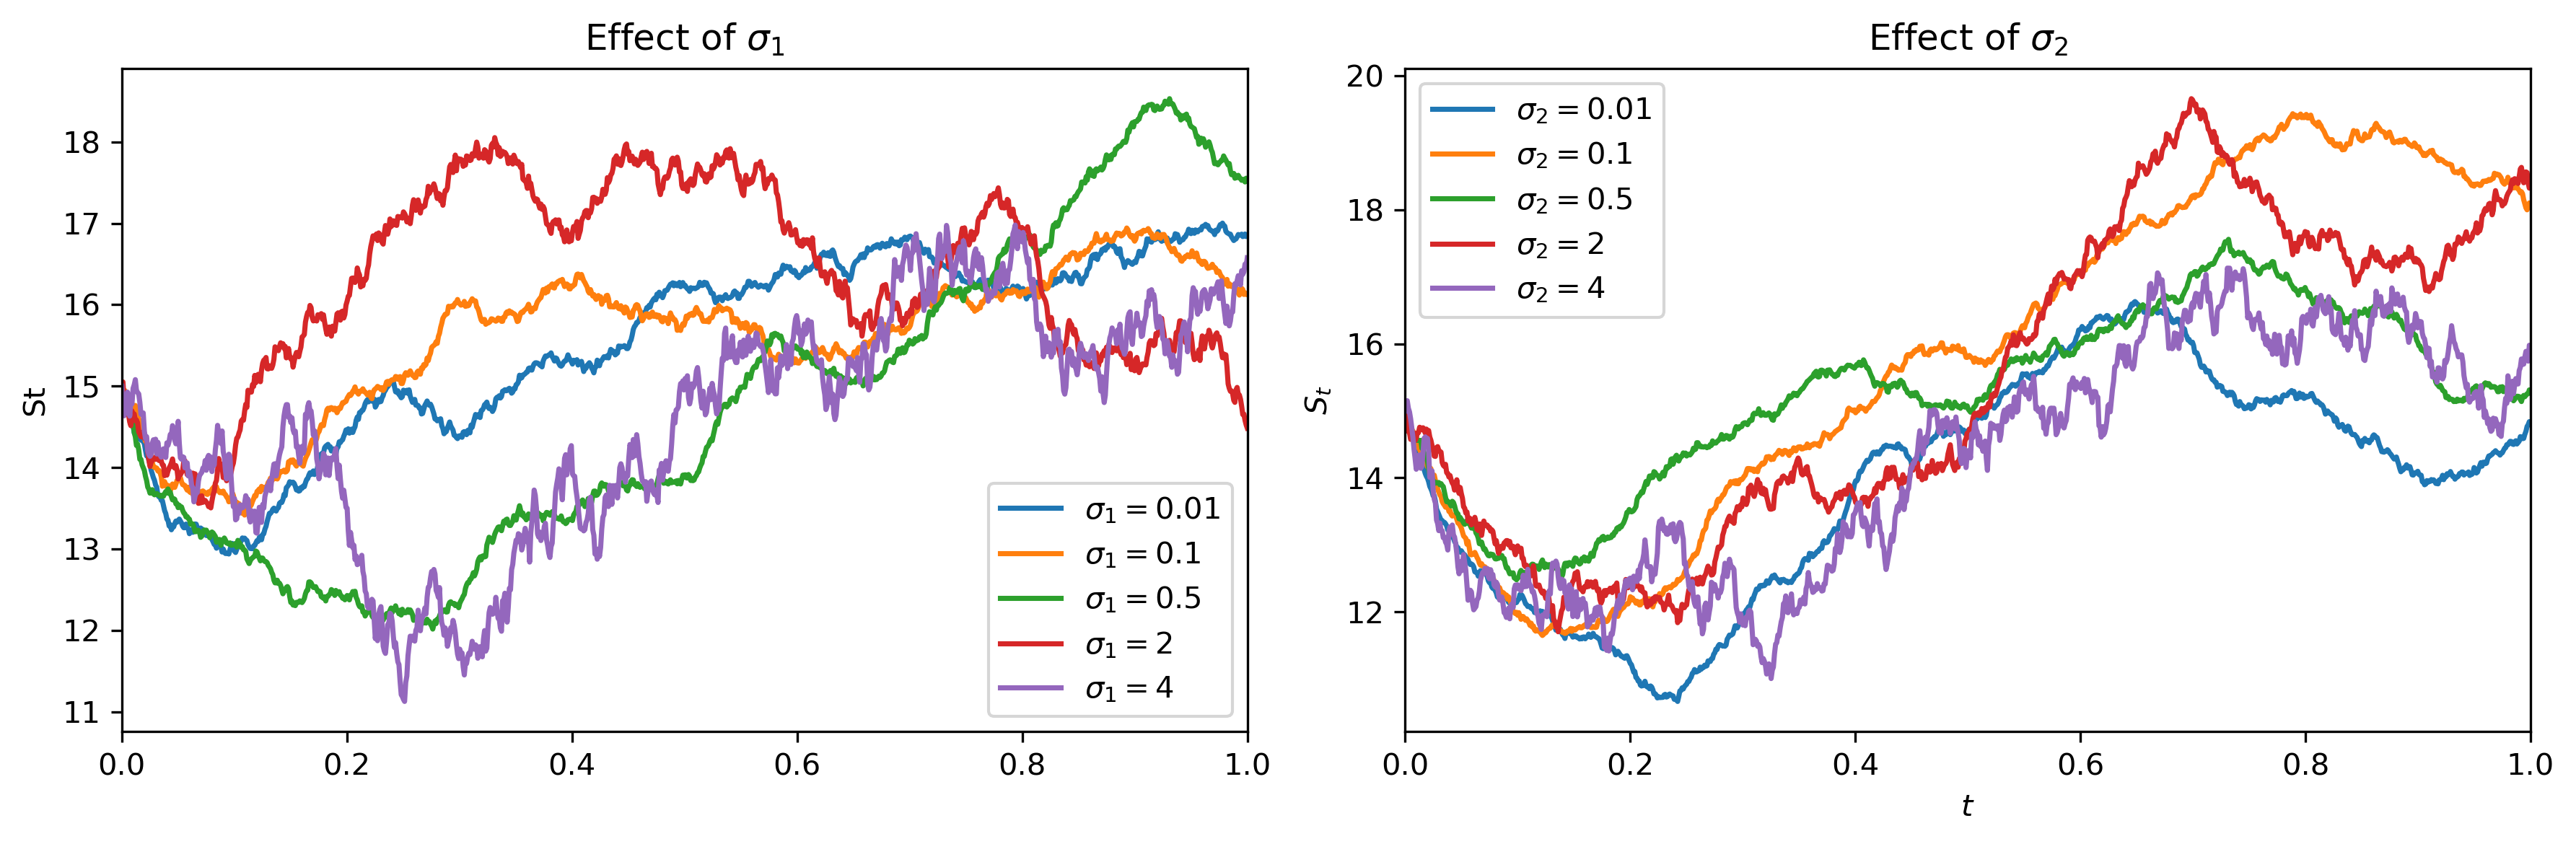

In [153]:
fig, ax = plt.subplots(nrows=1,ncols=2, dpi=300, figsize=(12,4))
axes = ax.flatten()
sigma1_list = [0.01, 0.1, 0.5, 2, 4]
sigma2_list = [0.01, 0.1, 0.5, 2, 4]


for sig1 in sigma1_list:
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, theta=theta, dt=dt, sigma1=sig1, sigma2=1, s0=s0, step=step)
    sns.lineplot(np.linspace(0, t, step), df['St'], lw=1.7, ax=axes[0], label=f'$\\sigma_1=${sig1}')  
#     sns.lineplot(np.linspace(0, t, step), df['St']-df['Xt'], lw=1.5, ax=axes[2], label=f'$\\sigma_1=${sig1}')  
    
for sig2 in sigma2_list:
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, theta=theta, dt=dt, sigma1=1, sigma2=sig2, s0=s0, step=step)
    sns.lineplot(np.linspace(0, t, step), df['St'], lw=1.7, ax=axes[1], label=f'$\\sigma_2=${sig2}')  
#     sns.lineplot(np.linspace(0, t, step), df['St']-df['Xt'], lw=1.5, ax=axes[3], label=f'$\\sigma_2=${sig2}')  
    
plt.xlabel('$t$')
plt.ylabel('$S_t$')

axes[0].set_title(f'Effect of $\\sigma_1$')
axes[1].set_title(f'Effect of $\\sigma_2$')
# axes[2].set_title(f'Effect of $\\sigma_1$: $S_t-Z_t$')
# axes[3].set_title(f'Effect of $\\sigma_2$: $S_t-Z_t$')
axes[0].set_xlim(0,1)
axes[1].set_xlim(0,1)
# axes[2].set_xlim(0,1)
# axes[3].set_xlim(0,1)
plt.tight_layout()

In [112]:
from tqdm import trange
def get_var(alpha_list=None, theta_list=None, mc_sim_num=50):
    var_list_X = []
    var_list_S = []
    if alpha_list is not None: 
        for a in tqdm(alpha_list):
            X1_list = []
            S1_list = []
            for i in range(mc_sim_num):
                df = simulate(alpha=a, v=v, sigma=sigma, x0=x0, theta=theta, dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s0, step=step)
                X1_list.append(df['Xt'].std())
                S1_list.append(df['St'].std())
            var_list_X.append(np.mean(X1_list))
            var_list_S.append(np.mean(S1_list))
    if theta_list is not None: 
        for t1 in tqdm(theta_list):
            X1_list = []
            S1_list = []
            for i in range(mc_sim_num):
                df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, theta=t1, dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s0, step=step)
                X1_list.append(df['Xt'].std())
                S1_list.append(df['St'].std())
            var_list_X.append(np.mean(X1_list))
            var_list_S.append(np.mean(S1_list))
    return var_list_X, var_list_S


In [113]:
alpha_list = np.logspace(-2, 1, 30)
var_list_X, var_list_S = get_var(alpha_list=alpha_list, mc_sim_num=3)

100%|███████████████████████████████████████████| 30/30 [00:31<00:00,  1.04s/it]


In [114]:
np.log10(alpha_list)

array([-2.        , -1.89655172, -1.79310345, -1.68965517, -1.5862069 ,
       -1.48275862, -1.37931034, -1.27586207, -1.17241379, -1.06896552,
       -0.96551724, -0.86206897, -0.75862069, -0.65517241, -0.55172414,
       -0.44827586, -0.34482759, -0.24137931, -0.13793103, -0.03448276,
        0.06896552,  0.17241379,  0.27586207,  0.37931034,  0.48275862,
        0.5862069 ,  0.68965517,  0.79310345,  0.89655172,  1.        ])

In [154]:
X1_list = []
S1_list = []
mc_sim_num = 500
for i in trange(mc_sim_num):
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, theta=theta, dt=dt, sigma1=sigma1, sigma2=sigma2, s0=s0, step=step)
    X1_list.append(df.iloc[-1, 0])
    S1_list.append(df.iloc[-1, 4])
X1_list, S1_list

100%|█████████████████████████████████████████| 500/500 [03:00<00:00,  2.77it/s]


([17.18403550021221,
  16.81369180834824,
  15.037430152661681,
  16.43243417420517,
  17.258913512322472,
  16.338984821232067,
  16.75447889497948,
  16.739398712073413,
  17.890229899452653,
  16.60283365454769,
  17.964696078550567,
  16.028969050030557,
  15.480255000058762,
  15.931833516222664,
  18.675369607457352,
  18.409641007905716,
  15.634209375657347,
  13.913515218738215,
  18.77002920464012,
  18.498686696459536,
  19.445745979925228,
  16.038905699318057,
  16.329442837794183,
  18.286080235237524,
  14.916640606584732,
  18.731096626720944,
  17.772100808543712,
  18.775570496418535,
  17.16135020291672,
  15.773021556545636,
  18.179680293117507,
  16.540687622808285,
  17.495583121320934,
  17.530396137511232,
  16.453576183177063,
  18.112068999381027,
  14.46807035858895,
  17.942855298387624,
  17.7650884596201,
  15.128830974935928,
  15.58489714696351,
  18.783456125050407,
  11.78113110477733,
  17.03786780677958,
  15.698637558943805,
  17.5748874476897,
  1

In [155]:
print(np.mean(X1_list), np.var(X1_list), np.std(X1_list))

17.05819185353467 2.496123680021868 1.5799125545491017


In [156]:
print(np.mean(S1_list), np.var(S1_list), np.std(S1_list))

17.039754506888737 5.673283888680655 2.3818656319533758
